# Transfer Learning

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import pickle
import numpy as np
import gc

In [4]:
gc.disable()
with open('images_array_tiny.pkl', 'rb') as file:
    X = pickle.load(file)
gc.enable()

In [5]:
with open('features_array.pkl', 'rb') as file:
    y = pickle.load(file)

In [8]:
model = tf.keras.applications.mobilenet.MobileNet()

In [3]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

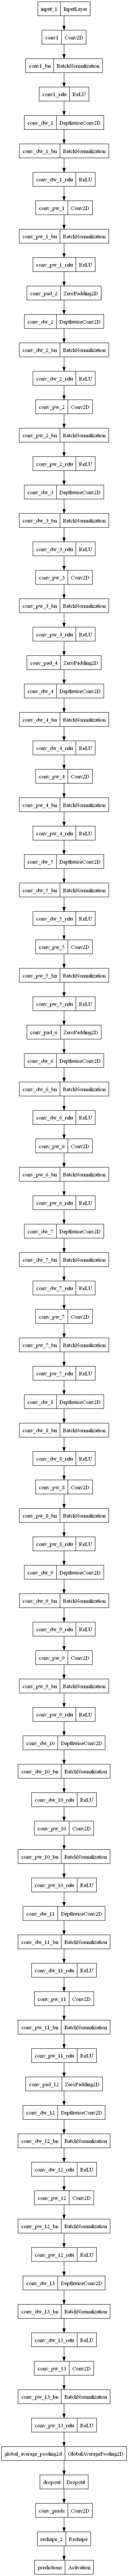

In [4]:
tf.keras.utils.plot_model(model)

In [9]:
model_input = model.layers[0].input
model_output = model.layers[-4].output

In [10]:
x = layers.Flatten()(model_output)
x = layers.Dense(1)(x)
final_output = layers.Activation('sigmoid')(x)

In [11]:
final_model = tf.keras.Model(inputs=model_input, outputs=final_output)

In [12]:
final_model.compile(loss='binary_crossentropy', 
                    optimizer='adam',
                    metrics=['accuracy'])

In [13]:
history = final_model.fit(X, y, epochs=5, validation_split=0.2)

Epoch 1/5
65/65 [==============================] - 470s 6s/step - loss: 0.9626 - accuracy: 0.5063 - val_loss: 0.9687 - val_accuracy: 0.4884
Epoch 2/5
65/65 [==============================] - 356s 5s/step - loss: 0.7089 - accuracy: 0.5912 - val_loss: 1.8128 - val_accuracy: 0.4903
Epoch 3/5
65/65 [==============================] - 335s 5s/step - loss: 0.6068 - accuracy: 0.6804 - val_loss: 1.2278 - val_accuracy: 0.5019
Epoch 4/5
65/65 [==============================] - 337s 5s/step - loss: 0.5038 - accuracy: 0.7638 - val_loss: 0.8543 - val_accuracy: 0.5446
Epoch 5/5
65/65 [==============================] - 340s 5s/step - loss: 0.4210 - accuracy: 0.8172 - val_loss: 1.5230 - val_accuracy: 0.4922


In [14]:
final_model.save('final_model.h5')

c:\Users\ALJAZEERA\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
